In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
import cv2
import numpy as np
import rawpy
import imutils

import matplotlib.pyplot as plt

from photo.film import detect, show, l2, angle

# To dos
- Close rectangles (e.g., for very under-exposed areas near the edges of a frame)
- Add aspect ratio filter (area is not sufficient)
- Crop, rotate, normalize, output
  - Crop: give some padding around each frame (users can see they got whole frame)

In [3]:
path = "/Users/dsuo/Downloads/2021-01-19-0001.dng"
fmt = "35"
with rawpy.imread(path) as raw:
    rgb = raw.postprocess()

In [4]:
rgb.shape

(17600, 13600, 3)

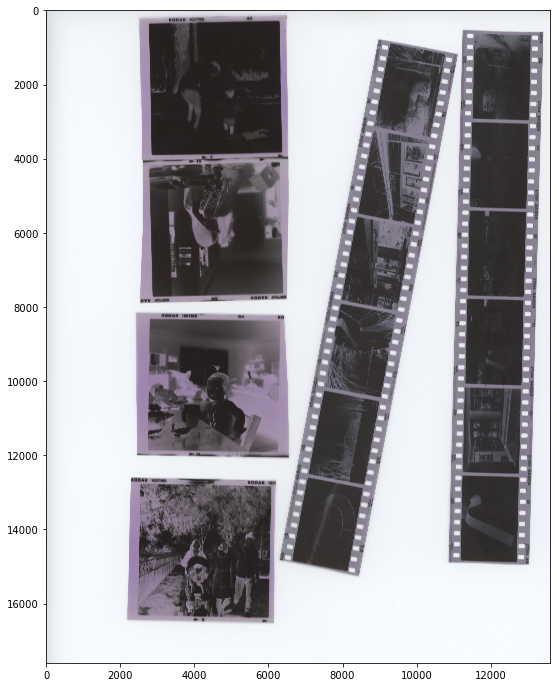

In [12]:
plt.figure(figsize=(16, 12))
plt.imshow(rgb)

In [20]:
paths = detect(rgb, fmt="35", area_threshold=0.1, dpi=1600)

100%|██████████| 32383/32383 [00:00<00:00, 45119.89it/s]


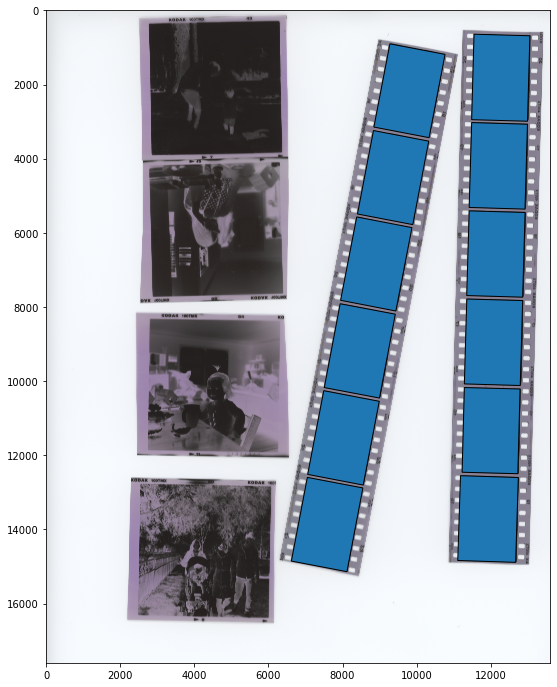

In [21]:
show(rgb, paths)

In [26]:
im = rgb
im.shape

(17600, 13600, 3)

In [37]:
bounding = []
boxes = []
padding = 0.25 * 1600
for path in paths:
    x, y, w, h = cv2.boundingRect(path)
    x = max(0, x - padding)
    y = max(0, y - padding)
    w = min(x + w + 2 * padding, im.shape[1]) - x
    h = min(y + h + 2 * padding, im.shape[0]) - y
    bounding.append(np.array([[x, y], [x + w, y], [x + w, y + h], [x, y + h], [x, y]]))
    boxes.append(np.array([x, x + w, y, y + h]))
    print(x, y, w, h)

6218.0 12197.0 2730.0 3345.0
10707.0 12151.0 2435.0 3139.0
6658.0 9857.0 2732.0 3348.0
11082.0 240.0 2372.0 3149.0
7106.0 7512.0 2717.0 3345.0
7546.0 5170.0 2726.0 3339.0
8444.0 499.0 2721.0 3333.0
8001.0 2839.0 2724.0 3339.0
11015.0 2624.0 2374.0 3136.0
10885.0 7384.0 2374.0 3135.0
10949.0 5006.0 2376.0 3130.0
10824.0 9773.0 2365.0 3126.0


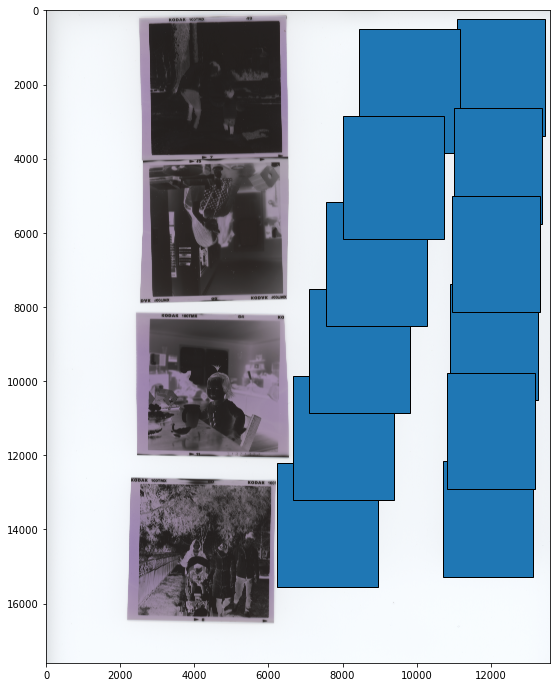

In [32]:
show(rgb, bounding)

In [70]:
for box in boxes:
    box = [int(b) for b in box]
    box = im[box[2]:box[3], box[0]:box[1]]

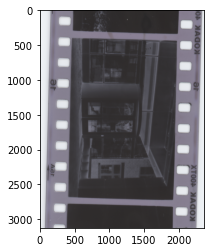

In [71]:
plt.imshow(box, cmap="gray")

In [72]:
path = detect(box)[0][:4]

100%|██████████| 880/880 [00:00<00:00, 37294.38it/s]


In [73]:
BL, BR = sorted(sorted(path, key=lambda x: x[1])[2:], key=lambda x: x[0])

In [75]:
th = angle([1, 0], BR - BL)

In [79]:
rotate = imutils.rotate_bound(box, -th * 180 / np.pi)

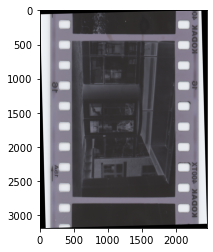

In [80]:
plt.imshow(rotate, cmap="gray")

In [93]:
path = detect(rotate)

100%|██████████| 584/584 [00:00<00:00, 38287.38it/s]


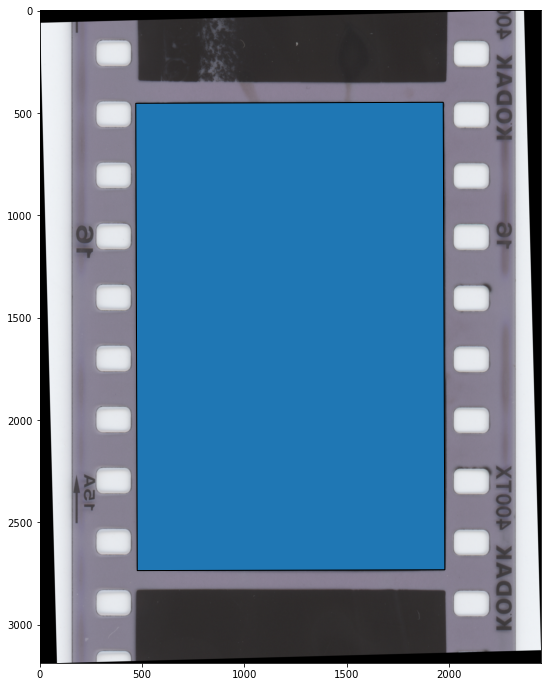

In [94]:
show(rotate, path)

In [97]:
x, y, w, h = cv2.boundingRect(path[0])

In [98]:
final = rotate[y:y+h, x:x+w]

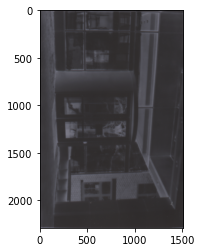

In [99]:
plt.imshow(final)